# Банк - Анализ оттока клиентов  

**Описание проекта**  
Предоставлены данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. В исследовании будут проанализированы клиенты регионального банка и выделен портрет клиентов, которые склонны уходить из банка.  
  
**Цель исследования**  
Дать рекомендации по повышению лояльности клиентов банка и удержанию их в числе постоянных клиентов на основе аналитических данных и материалов по проверке гипотез.  
  
**Задача**  
Необходимо:   
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.

## Шаг 1. Загрузка данных и подготовка к анализу

### Импорт библиотек, датасетов и создание функций

In [1]:
# Импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math as mth
from matplotlib import rcParams
from scipy import stats as st
from scipy.stats import levene
import qgrid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools


sns.set(rc={'figure.figsize': (15, 6)}, font_scale=1.2, palette='tab20')
warnings.simplefilter('ignore')
rcParams['figure.figsize'] = 15, 6

In [2]:
# импорт датасета
df = pd.read_csv('bank_dataset.csv')

In [3]:
def my_analysis(data):
    '''Функция для анализа датафрейма.'''

    # Общая информация.
    print('\033[1m Общая информация \n \033[0m')
    data.info()
    print(30 * '= ')

    # Вывод первых 5 строк датафрейма.
    print('\033[1m Первые 5 строк датафрейма \033[0m')
    display(data.head())
    print(30 * '= ')

    # Названия столбцов.
    print(f'\033[1m Названия столбцов: \033[0m {list(data.columns)}')
    print(30 * '= ')

    # Пропуски.
    print('\033[1m Инофрмация о пропусках \033[0m')
    display(data.isna().sum())
    print(30 * '= ')

    # Полные дубликаты.
    print(f'\033[1m Полных дубликатов: \033[0m {data.duplicated().sum()}')
    print(60*'=')
    # return


def unique(data):
    '''Функция для анализа уникальных значений в столбцах.'''

    for gg in data:
        print(f'\033[1m Столбец {data[gg].name} \033[0m')
        print(data[gg].unique())

### Первичный анализ и предобработка данных

In [4]:
my_analysis(df)

 Общая информация 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Первые 5 строк датафрейма 


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Названия столбцов:  ['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance', 'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Инофрмация о пропусках 


userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Полных дубликатов:  0


In [5]:
print('\033[1mКоличество уникальных пользователей:\033[0m',
      df.userid.nunique())

Количество уникальных пользователей: 10000


In [6]:
# название столбцов в нижнем регистре
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

### Вывод

Для анализа предоставленна таблица *bank_dataset*  
В таблице 12 столбцов и 10.000 строк

Колонки:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.  
  
Наименования столбцов в разном регистре. Привел в нижний регистр.  
В столбце `Balance` 3617 пропусков. Посмотрим их подробнее в исследовательском анализе и решим что с ними делать.  
Полные дубликаты отсутствуют.
  

## Шаг 2. Иследовательский анализ данных.

In [7]:
# распределение
df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
min_wage = 15279 # мрот 
print('\033[1mКоличество клиентов с зарплатой меньше МРОТ:', 
      df.query('estimated_salary < 15279').userid.count())

Количество клиентов с зарплатой меньше МРОТ: 761


Средние и медианные значения близки, что говорит нам о нормальном распределении.  
В столбце `estimated_salary` есть аномально низкие значения. Мы не знаем как собирались и выгружались данные. Возможно ошибка в данных при заполнении или выгрузке. 761 клиент получает зарплату ниже МРОТ, если верить текущим данным.  
Аномалий в других данных не обнаружено.

In [9]:
# таблица с количеством клиентов с балансом и без, для каждого параметра
col = [
    'city', 'gender', 'objects', 'products', 'creditcard', 'loyalty', 'churn'
]

for i in col:
    table = df.query('balance.isna()')[i].value_counts().reset_index()
    table.columns = columns = [i, 'qnt']
    table2 = df.query('~balance.isna()')[i].value_counts().reset_index()
    table2.columns = columns = [i, 'qnt_with_bal']
    print(f'\033[1m {i} \033[0m')
    display(table.merge(table2, on=i))

 city 


,city,qnt,qnt_with_bal
0,Ярославль,2418,2596
1,Рыбинск,1199,1278


 gender 


,gender,qnt,qnt_with_bal
0,М,1963,3494
1,Ж,1654,2889


 objects 


,objects,qnt,qnt_with_bal
0,7,386,642
1,2,382,666
2,5,374,638
3,4,369,620
4,6,367,600
5,8,363,662
6,9,360,624
7,3,352,657
8,1,349,686
9,10,178,312


 products 


,products,qnt,qnt_with_bal
0,2,2600,1990
1,1,905,4179
2,3,98,168
3,4,14,46


 creditcard 


,creditcard,qnt,qnt_with_bal
0,1,2592,4463
1,0,1025,1920


 loyalty 


,loyalty,qnt,qnt_with_bal
0,1,1873,3278
1,0,1744,3105


 churn 


,churn,qnt,qnt_with_bal
0,0,3117,4846
1,1,500,1537


В целом нельзя сказать что есть корреляция между пустым значением в поле balance и каким-либо параметром.  
Половина пользователей без баланса активны, и только 500 из них ушедшие. Возможно это ошибка при выгрузке данных, или на момент выгрузки на счетах действительно не было денежных средств, или это кредитные клиенты. Заполню пропуски нулем.

In [10]:
# заполнение пропусков
df.balance = df.balance.fillna(0)

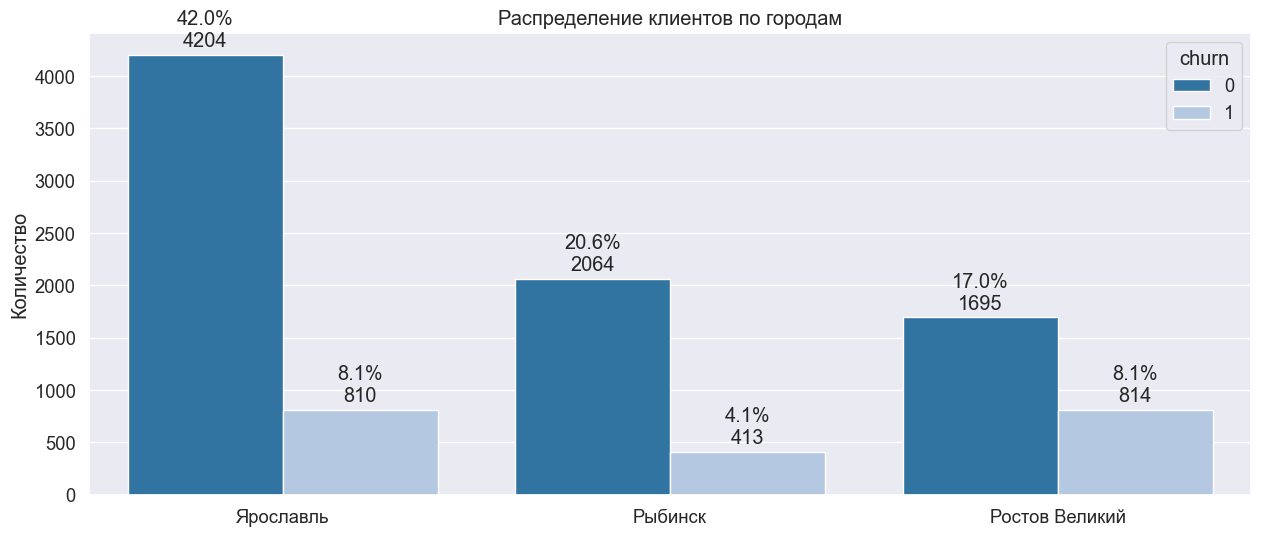

In [11]:
# столбчатый график
ax = sns.countplot(data=df, x='city', hue='churn')
ax.set_title('Распределение клиентов по городам')
ax.set_xlabel('')
ax.set_ylabel('Количество')
for c in ax.containers:
    labels = [
        f'{v.get_height() / df.churn.count():0.1%}\n{v.get_height():.0f}'
        for v in c
    ]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3)
plt.show()

In [12]:
# преобразование категориальных переменных в горячую кодировку
df_dumm = pd.get_dummies(df)

# рассчет оттока и доли. по городам
(df_dumm.groupby('churn')
 ['city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль'].sum()
 .assign(rostov_ratio=lambda x: x['city_Ростов Великий'] 
         / df_dumm['city_Ростов Великий'].sum())
 .assign(ribinsk_ratio=lambda x: x['city_Рыбинск'] 
         / df_dumm['city_Рыбинск'].sum())
 .assign(yaroslavl_ratio=lambda x: x['city_Ярославль'] 
         / df_dumm['city_Ярославль'].sum())
 .style.set_caption('Доля клиентов в оттоке и нет. По городам'))

,city_Ростов Великий,city_Рыбинск,city_Ярославль,rostov_ratio,ribinsk_ratio,yaroslavl_ratio
churn,,,,,,
0,1695.000000,2064.000000,4204.000000,0.675568,0.833266,0.838452
1,814.000000,413.000000,810.000000,0.324432,0.166734,0.161548


50,1% клиентов находится в Ярославле (численность населения в 3 раза больше Рыбинска)  
24,7% клиентов в Рыбинске (в 8 раз больше Ростова Великого)  
25,1% в Ростове Великом  

Доля оттока в разрезе города:  
В Ростове самая большая доля оттока - 32%.  
В Ярославле и Рыбинске по 16%

In [13]:
# рассчет оттока и доли. по полу
(df_dumm.groupby('churn')['gender_Ж', 'gender_М'].sum()
 .assign(Ж_ratio=lambda x: x['gender_Ж'] 
         / df_dumm['gender_Ж'].sum())
 .assign(М_ratio=lambda x: x['gender_М'] 
         / df_dumm['gender_М'].sum())
 .style.set_caption('Доля клиентов в оттоке и нет. По полу'))

,gender_Ж,gender_М,Ж_ratio,М_ratio
churn,,,,
0,3404.000000,4559.000000,0.749285,0.835441
1,1139.000000,898.000000,0.250715,0.164559


Клиентов мужского пола больше 5457 против 4543. Доля оттока женщин 25% против 16,5% у мужчин

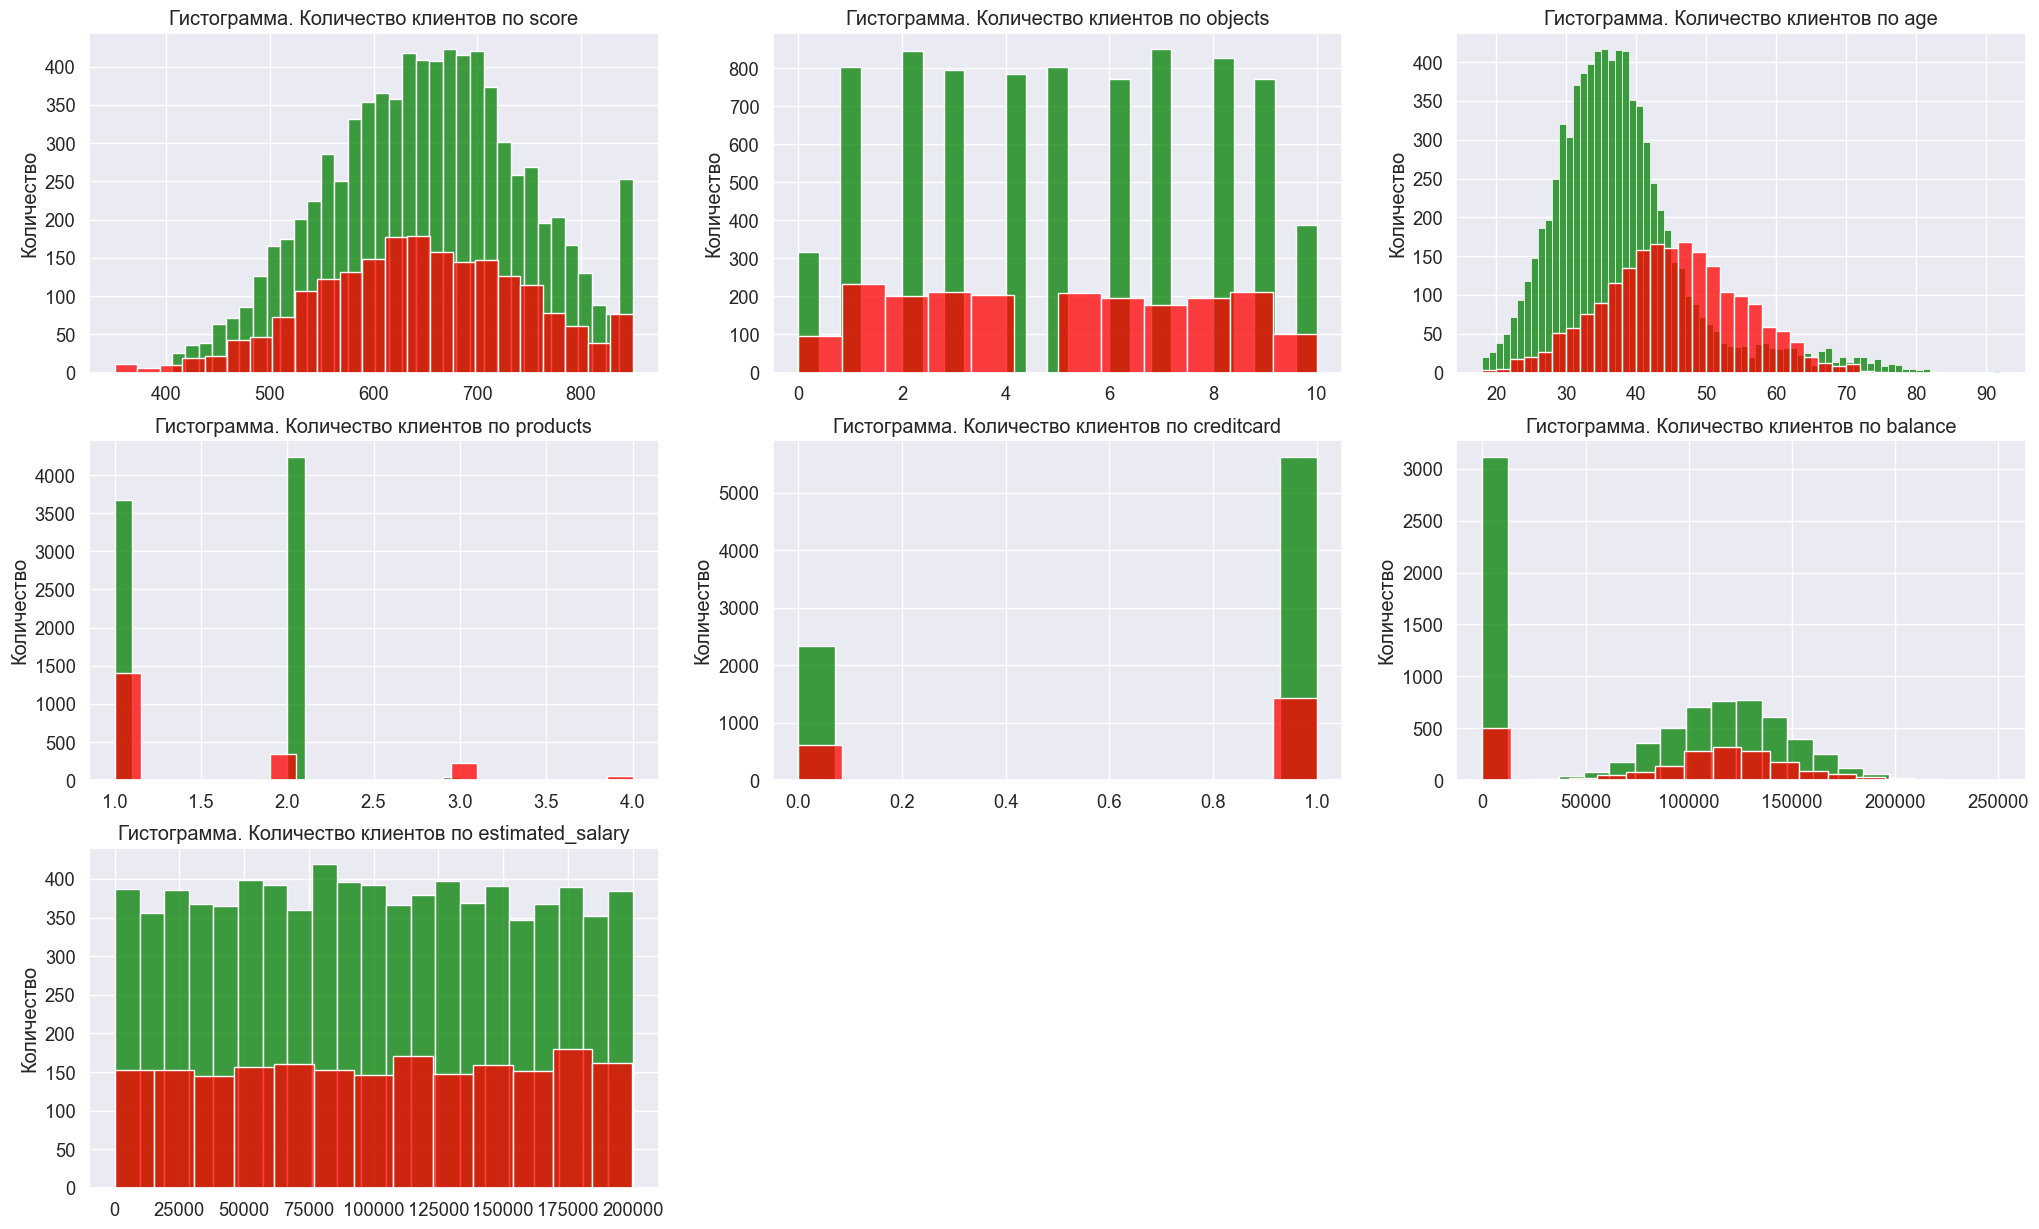

In [14]:
# распределения признаков ушедших и текущих. гистограмма
cols = ['score', 'objects', 'age', 'products',
        'creditcard', 'balance', 'estimated_salary']

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    fig = plt.gcf()
    fig.set_size_inches(25, 15)
    sns.histplot(data=df.query('churn==0')[col], color="Green", label='0')
    sns.histplot(data=df.query('churn==1')[col], color="Red", label='1')
    plt.title(f'Гистограмма. Количество клиентов по {col}')
    plt.xlabel('')
    plt.ylabel('Количество')

In [15]:
# выявим возраста в котором клиентов в оттоке больше.
(
 df.pivot_table(
    index='age', columns='churn', values='userid', aggfunc='count')
    .assign(diff=lambda x: x[0] - x[1]).query('diff < 0')
    .style.set_caption('Возраст в котором отток больше текущих клиентов')
) 

churn,0,1,diff
age,,,
49,72.000000,75.000000,-3.000000
50,63.000000,71.000000,-8.000000
51,53.000000,66.000000,-13.000000
52,38.000000,64.000000,-26.000000
53,34.000000,40.000000,-6.000000
54,33.000000,51.000000,-18.000000
55,34.000000,48.000000,-14.000000
56,20.000000,50.000000,-30.000000
57,37.000000,38.000000,-1.000000


In [16]:
(
df.pivot_table(
    index='products', columns='churn', values='userid', aggfunc='count')
 .assign(churn_ratio=lambda x: x[1] / (x[1]+x[0]))
 .style.set_caption('Доля оттока по количеству продуктов')
)

churn,0,1,churn_ratio
products,,,
1,3675.000000,1409.000000,0.277144
2,4242.000000,348.000000,0.075817
3,46.000000,220.000000,0.827068
4,nan,60.000000,nan


*score, objects, creditcard, balance, estimated_salary* - не имеет влияние на отток.  
  
*age*  
Клиентами банка являются люди в возрасте от 18-92 лет.  
Чаще услугами банка пользуются люди в возрасте от 30-40.    
В возрасте от 49-60 лет клиентов в оттоке больше текущих клиентов.  
  
*products*    
Почти все клиенты с количеством продуктов 3 и более ушли в отток. Таких клиентов было значительно меньше клиентов с продуктами до 2-х шт.  
27% клиентов с одним продуктом ушли в отток. И только 7,5% клиентов с 2-мя продуктами ушли в отток


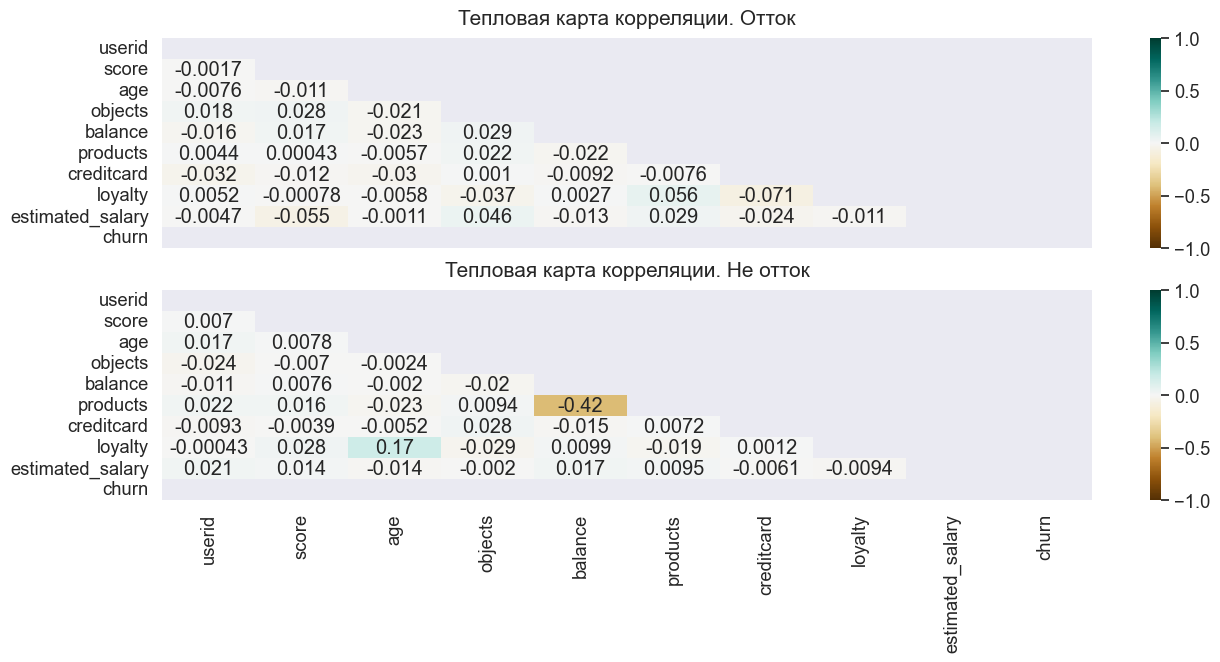

In [17]:
# тепловая карта
fig, axes = plt.subplots(2, 1, figsize=(15, 6), sharex=True, sharey=True)

# отток
mask = np.triu(np.ones_like(df.query('churn==1').corr(), dtype=np.bool))
heatmap = sns.heatmap(df.query('churn==1').corr(),
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG',
                      ax=axes[0])
heatmap.set_title('Тепловая карта корреляции. Отток',
                  fontdict={'fontsize': 15},
                  pad=10)

# иекущие клиенты
mask1 = np.triu(np.ones_like(df.query('churn==0').corr(), dtype=np.bool))
heatmap1 = sns.heatmap(df.query('churn==0').corr(),
                       mask=mask,
                       vmin=-1,
                       vmax=1,
                       annot=True,
                       cmap='BrBG',
                       ax=axes[1])
heatmap1.set_title('Тепловая карта корреляции. Не отток',
                   fontdict={'fontsize': 15},
                   pad=10)

plt.show()

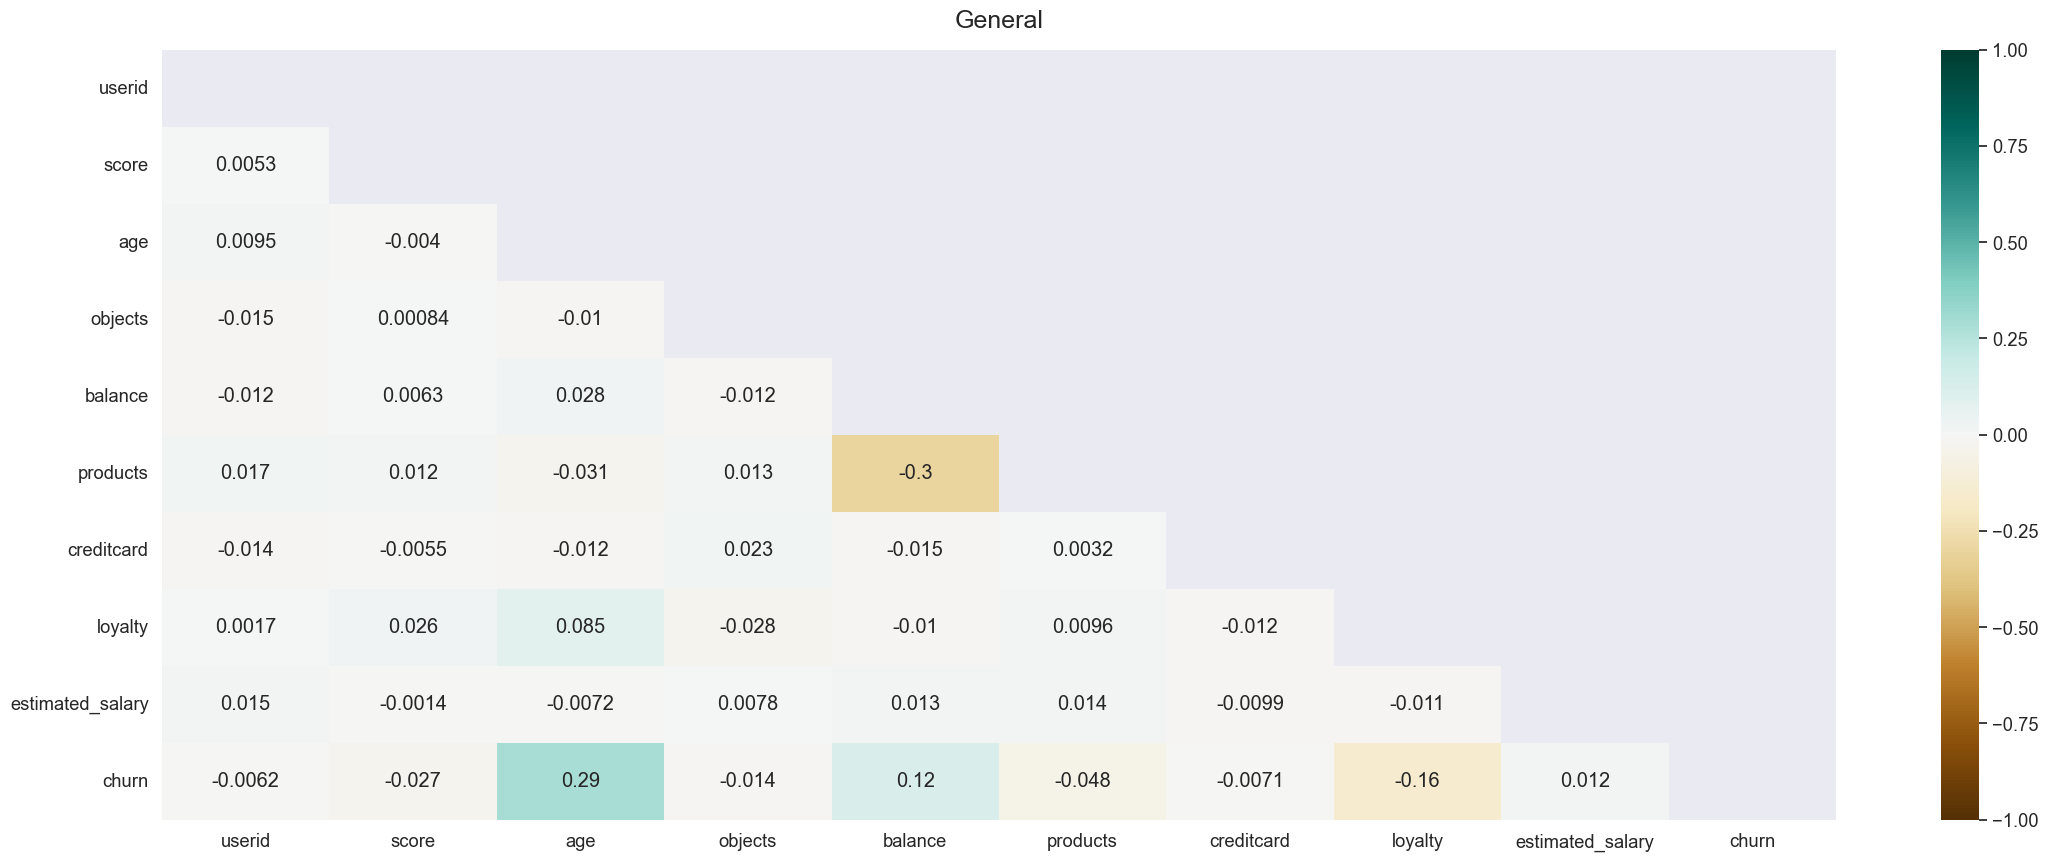

In [18]:
plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 

heatmap.set_title('General', fontdict={'fontsize':18}, pad=16)
plt.show()

Корреляций не выявлено. Ни среди тех кто ушел, ни среди тех кто остается киентом банка.

In [19]:
# средние значения
(df_dumm.groupby('churn')[
    'score', 'objects', 'products', 'estimated_salary', 'balance'
].mean().join(
     df_dumm.query('balance>0')
     .groupby('churn')['balance'].mean(), rsuffix='>0'))

,score,objects,products,estimated_salary,balance,balance>0
churn,,,,,,
0,651.853196,5.033279,1.544267,99738.391772,72745.296779,119535.864270
1,645.351497,4.932744,1.475209,101465.677531,91108.539337,120746.971132


Среднее значение количества баллов, недвижимости, продуктов клиентов в оттоке и текущих клиентов практически не отличаются.  
Средний баланс у текущих клиентов меньше на 9000 чем у оттока. Если не учитывать клиентов с 0-м балансом, то средний баланс не отличается.

In [20]:
(df.groupby('churn', as_index=False).loyalty.mean()
 .style.set_caption('Лояльность текущих и ушедших клиентов'))

,churn,loyalty
0,0,0.554565
1,1,0.360825


### Вывод  
  
Пропуски в столбце balance. Возможно техническая ошибка. Так же возможно клиенты не имеют дебетовый счет. Корреляции между пустыми значениями и каким либо параметром не выявлено.  
  
Половина клиентов находится в городе Ярославаль, остальные клиенты поровну расположены в Рыбинске и Ростове Великом.  
В Ростове самый большой отток. 32,44% процента клиентов из Ростова ушли в отток.  
  
Клиентов мужского пола больше 5457 против 4543. Доля оттока среди женщин 25% против 16,5% среди мужчин.  
  
Клиентами банка являются люди в возрасте от 18 до 92 лет. Средний возраст 38 лет.  
Имеют недвижимость до 10 шт, в среднем 5. Пользуются до 4-х продуктов банка, в среднем 1.  
70% владеют кредитной картой. Только 51% клиентов являются лояльными.  
Средняя зарплата 100090 рублей, и на балансе в среднем хранят 100119 рублей.  
Людей в оттоке в возрасте от 49-60, больше чем текущих клиентов.  
  
Лояльность клиентов ушедших в отток всего лишь 36%    
  
Почти все клиенты с количеством продуктов 3 и более ушли в отток. Таких клиентов было значительно меньше клиентов с продуктами до 2-х шт.
27% клиентов с одним продуктом ушли в отток. И только 7,5% клиентов с 2-мя продуктами ушли в отток  
  
Среднее значение количества баллов, недвижимости, продуктов клиентов в оттоке и текущих клиентов практически не отличаются.
Средний баланс у текущих клиентов меньше на 9000 чем у оттока. Если не учитывать клиентов с 0-м балансом, то средний баланс не отличается.  

## Прогноз

In [21]:
df_forecast =  pd.get_dummies(df)

In [22]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_forecast.drop(columns=['churn'])
y = df_forecast['churn']

# указываем параметр random_state при разделении выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# список моделей
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(random_state=0)
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    )

In [23]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0, solver='liblinear')
Accuracy: 0.81 Precision: 0.58 Recall: 0.24
RandomForestClassifier(random_state=0)
Accuracy: 0.86 Precision: 0.75 Recall: 0.50


### Вывод  
  
Метрика **accuracy** означает долю верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше. Работает только при условии баланса классов — когда объектов каждого класса примерно поровну, 50% : 50%.  
**Precision** показывает долю правильных ответов только среди целевого класса.  
**Recall** говорит о том, сколько реальных объектов целевого класса мы обнаружили с помощью модели.  
  
Созданы две модели прогнозирования оттока клиентов: **LogisticRegression и RandomForestClassifier**. По трем метрикам сравнены модели для определения лучшей: accuracy, precision и recall.

В данном исследовании модель "Случайного леса" показала себя немного лучше "логистическая регрессия" на основании метрик "Precision" и "Recall". Значение метрики "Accuracy" выше у "Случайного леса" на 5 пунктов.  

## Шаг 4. Кластеризация клиентов

In [24]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Создание матрицы расстояний функцией linkage()
linked = linkage(x_sc, method = 'ward')

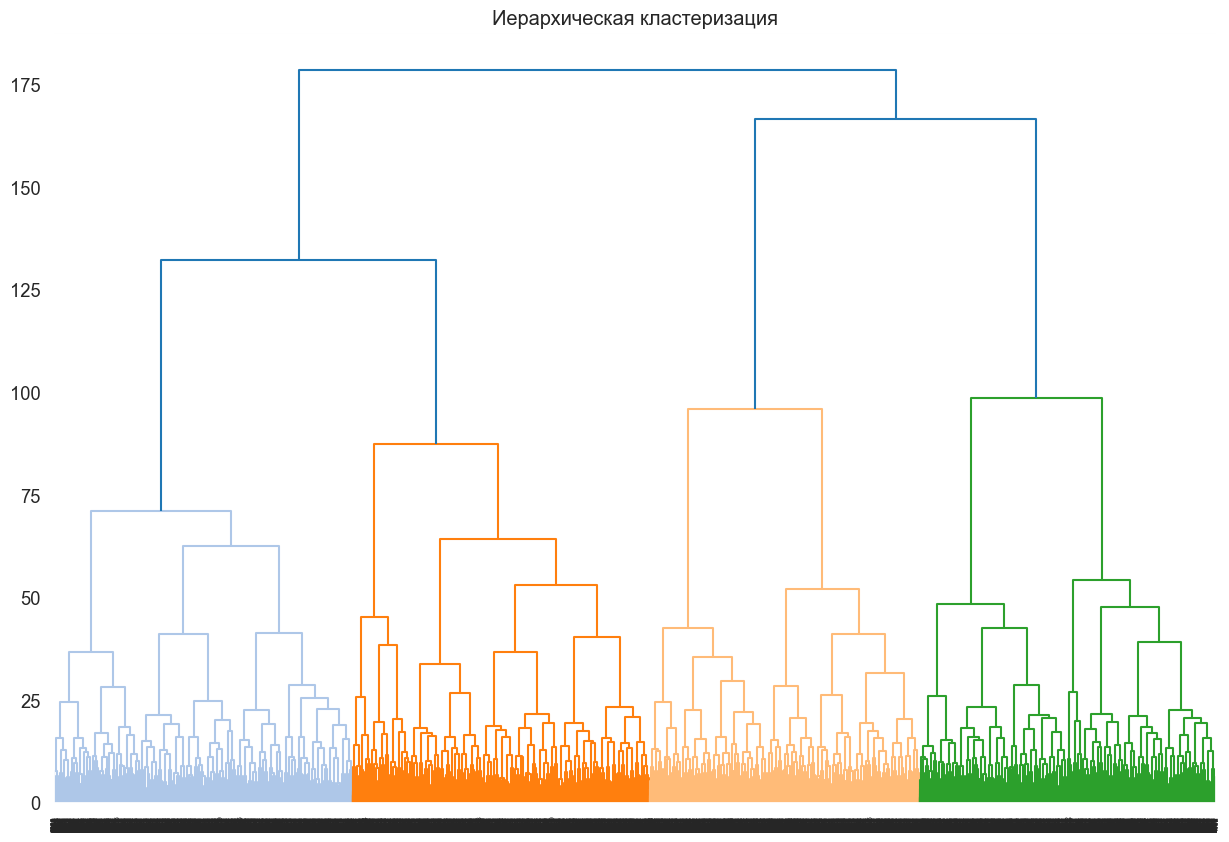

In [25]:
# дендограмма
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

In [26]:
# задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле датасета
df_forecast['cluster'] = labels

In [27]:
# выводим статистику по средним значениям признаков по кластеру
df_forecast.groupby('cluster').mean()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
cluster,,,,,,,,,,,,,,,
0,1.573329e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432,1.0,0.0,0.0,0.475488,0.524512
1,1.573203e+07,650.064657,38.296404,5.049401,63546.284875,1.517254,0.713767,0.519070,100174.252495,0.127134,0.0,0.0,1.0,0.000000,1.000000
2,1.573465e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734,0.0,1.0,0.0,0.439645,0.560355
3,1.573504e+07,649.185759,38.773994,4.950022,60322.670159,1.547545,0.697921,0.513932,99564.252755,0.203450,0.0,0.0,1.0,1.000000,0.000000


### Графики

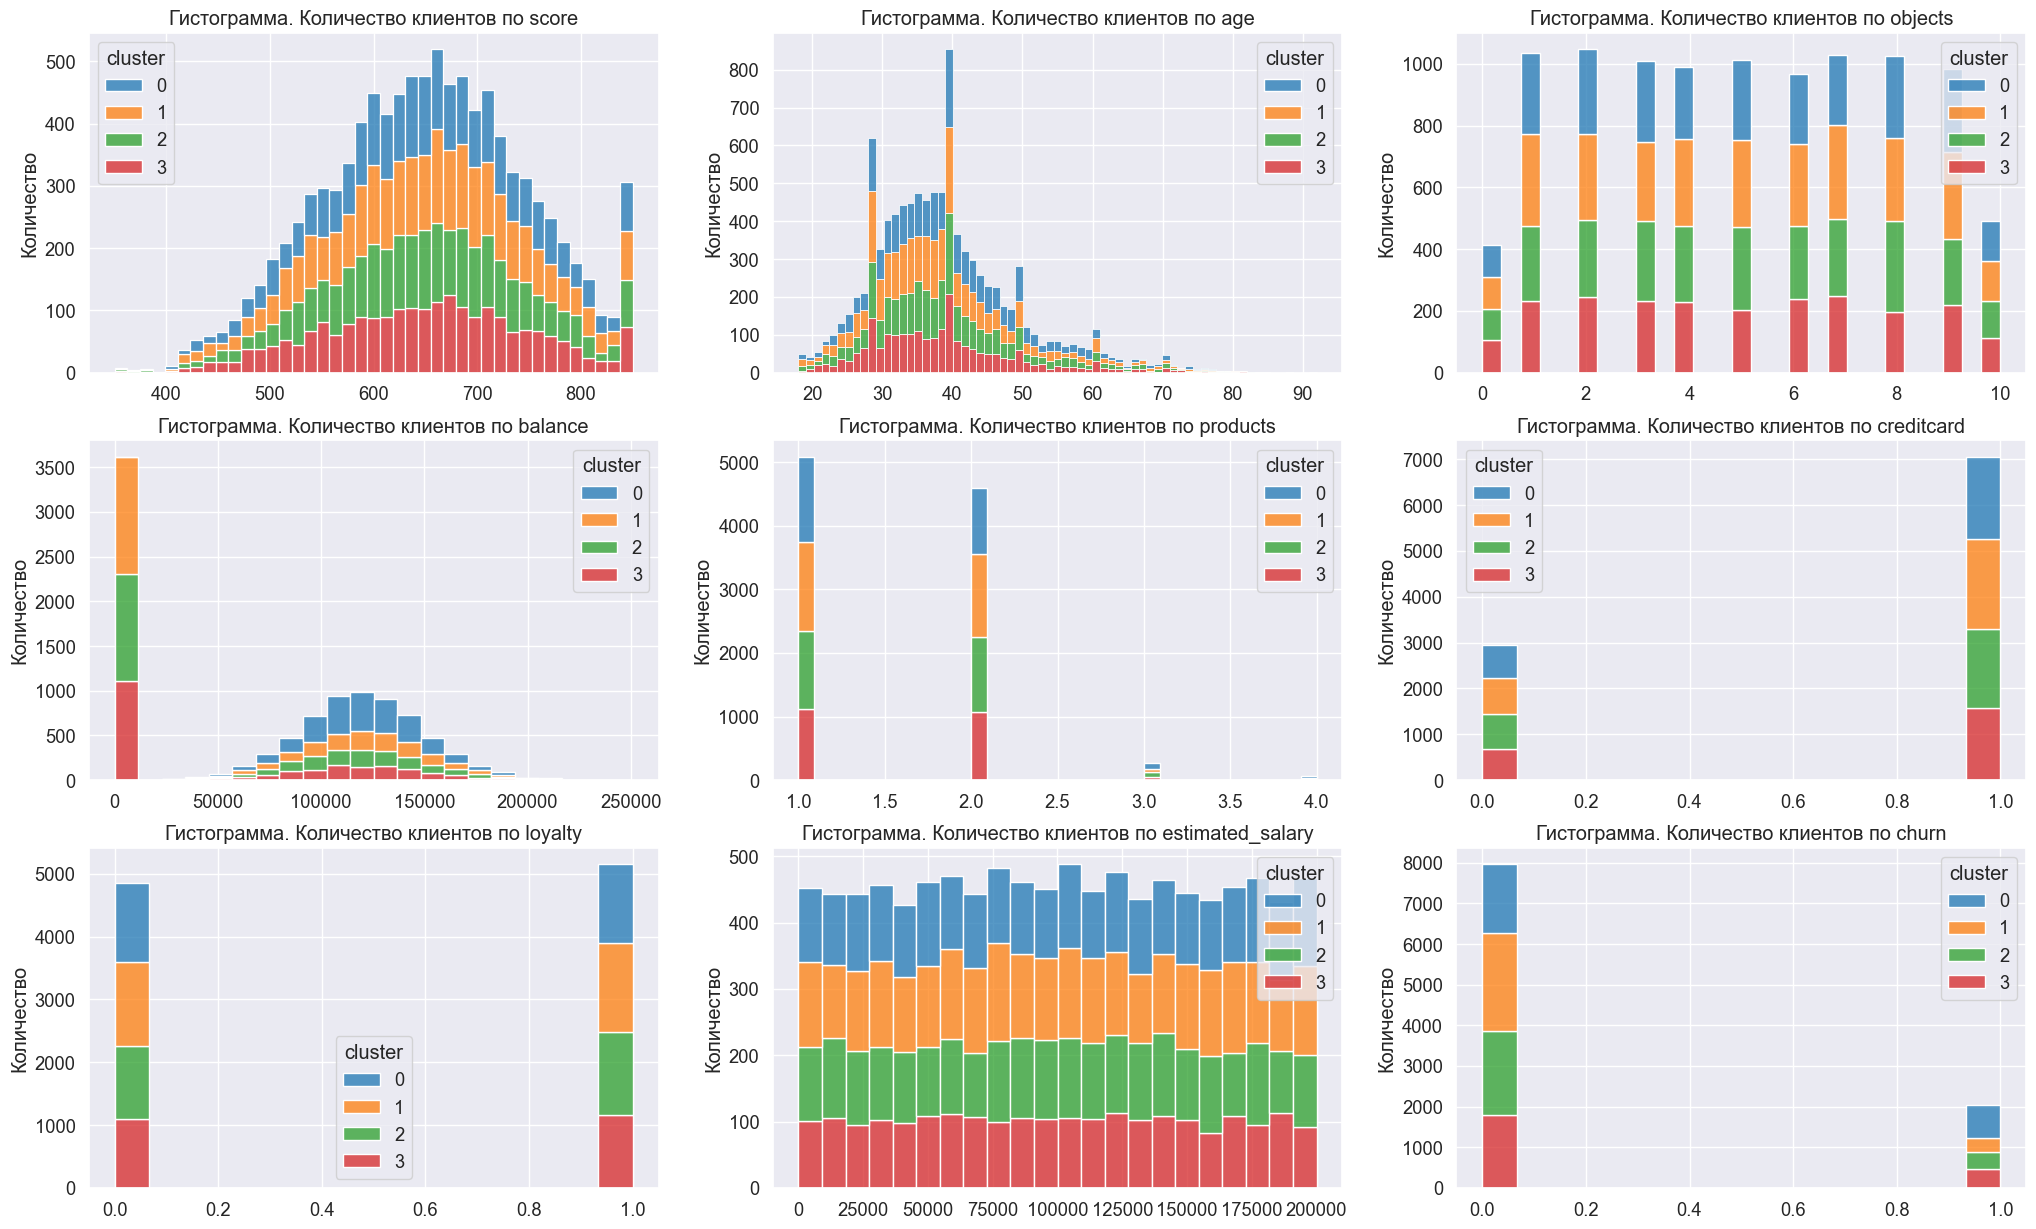

In [28]:
# распределения признаков для кластеров. гистограмма
cols = ['score', 'age', 'objects', 'balance', 'products',
        'creditcard', 'loyalty', 'estimated_salary', 'churn']

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    fig = plt.gcf()
    fig.set_size_inches(25, 15)
    sns.histplot(
        df_forecast, x=df_forecast[col], hue='cluster', palette="tab10", multiple='stack')
    plt.title(f'Гистограмма. Количество клиентов по {col}')
    plt.xlabel('')
    plt.ylabel('Количество')

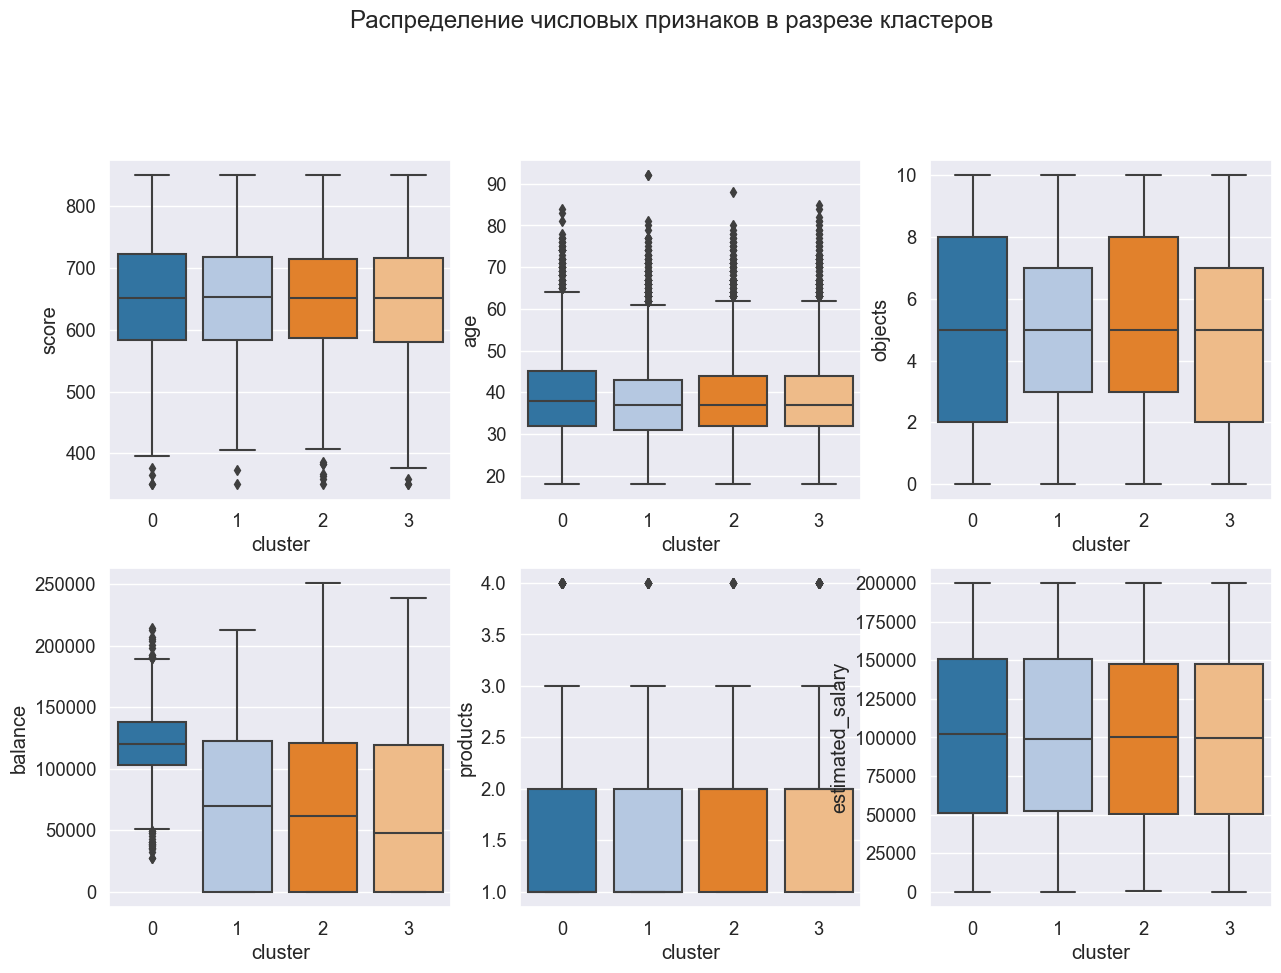

In [29]:
# для непрерывных признаков построим boxplot
cols = ['score', 'age', 'objects', 'balance', 'products', 'estimated_salary']


for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    axe = sns.boxplot(data=df_forecast, y=col, x='cluster')
    fig.suptitle('Распределение числовых признаков в разрезе кластеров')
    

### Вывод  
  
Предложенное оптимальное число кластеров равняется 4 (разные цвета на графике). Иерархическая кластеризация происходит по городам, при этом Ярославль разбивает на два сегмента по полу клиента.    
  
Характерной особенностью кластеров является следующее. 
  
Нулевой кластер - город Ростов великий, самый большой процент оттока 32,44% и самый большой отток ~800 чел., самая низкая лояльность 0,49, в среднем самый высокий баланс 119730(менее 50000 это выбросы), средний возраст на год выше чем в других кластерах(39,77)  
  
Кластер 1 - город Ярославль, мужчины, самый низкий отток 12,71%.  
  
Кластер 2 - город Рыбинск, отток 16,67%, самая высокая лояльность 0,52.  
  
Кластер 3 - город Ярославль, женщины, второе место по оттоку 20,34%, в среднем самый низкий баланс 60322 и меньше всего объектов 4,95  
  
Остальные признаки на одинаковом уровне  
  


## Шаг 3. Проверка статистических гипотез

### Гипотеза №1

**Нулевая** - Средний возраст ушедших и оставшихся клиентов равен  
**Альтернативная** - Средний взраст ушедших и оставшихся клиентов различаются

In [30]:
# выборки
sample_1 = df.query('churn == 0')['age'] # выборка возраст текущих клиентов
sample_2 = df.query('churn == 1')['age'] # выборка возраст ушедших клиентов

# тест Леванте
stat, p = levene(sample_1, sample_2)
p

0.00030692323049423515

Результат по тесту Левене не превышает 0,05. Это говорит нам о том, что дисперсии не гомогенны, при проверке используем параметр  equal_var = False.

In [31]:
alpha = 0.05 # порог значимости 

# тест Манна — Уитни
results = st.ttest_ind(sample_1, sample_2)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение: 1.2399313093427738e-186
Отвергаем нулевую гипотезу: разница статистически значима


#### Вывод
Тест показал статистическую разницу между средним возрастом ушедших и оставшихся клиентов, следовательно, мы не можем принять нулевую гипотезу.

### Гипотеза №2

**Нулевая** - Средняя доля ушедших женщин и мужчин не отличаются  
**Альтернативная** - Средняя доля ушедших женщин и мужчин разные

In [32]:
# сводная по оттоку. количество М и Ж
test = df_dumm.groupby('churn')['gender_Ж', 'gender_М'].sum()
test

,gender_Ж,gender_М
churn,,
0,3404.0,4559.0
1,1139.0,898.0


In [33]:
alpha = 0.05 / 3  # критический уровень статистической значимости с учетом поправки Бонферонни

successes = np.array([test.loc[1, 'gender_Ж'], test.loc[1, 'gender_М']])
total_users = np.array([test.gender_Ж.sum(),
                        test.gender_М.sum()])

# пропорция успехов в первой группе:
p1 = successes[0]/total_users[0]

# пропорция успехов во второй группе:
p2= successes[1]/total_users[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (total_users[0] + total_users[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / \
    mth.sqrt(p_combined * (1 - p_combined) *
             (1/total_users[0] + 1/total_users[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Вывод
Тест показал статистическую разницу между долями ниже критического уровня, следовательно мы не можем принять нулевую гипотезу.

## Общий вывод.  

**Исследовательский анализ данных**
Предоставленные данные достаточно "чистые". Из аномалий можно выделить:  
- 3617 пропусков в столбце balance.  
- Низкая зарплата. 761 клиент с зарплатой меньше МРОТ, вплоть до 100 рублей  
- Резкий рост количества клиентов с баллами кредитного скоринга около 850.  
  
Половина клиентов(текущих и ушедших) находятся в Ярославле, остальные в равной доле в Ростове Великом и Рыбинске.  
В Ростове самый сильный отток - 32,44%, в Ярославле и Рыбинске по 16%.  
  
Среди женщин отток 25% , и 16% среди мужчин.  
  
Старшее поколение чаще уходит в отток. Клиентов в оттоке возрасте от 49-60 больше чем текущих клиентов.  
  
Клиенты ушедшие в отток чаше имеют всего один продукт, и имеют кредитную карту.  

Среди ушедших в отток только 36% были лояльными.  
  
  
**Проверка гипотез:**  
  
Тест показал статистическую разницу между средним возрастом ушедших и оставшихся клиентов, следовательно, мы не можем принять нулевую гипотезу.  
Тест показал статистическую разницу между долями ниже критического уровня, следовательно, мы не можем принять нулевую гипотизу.
  
  
**Рекомендации:**  
- Необходимо провести анализ рынка в Ростове, возможно там есть конкурент с более выгодными продуктами и условиями.  
- Проанализировать возможность разработки целевых продуктов и условий для женщин.  
- Мы можем предположить что клиенты старшего поколения ушли в отток выплатив кредит. Можно разработать программу по удержанию таких клиентов. Например, предлагать более выгодные условия после закрытия кредита, или предложить другие продукты помимо кредитного.  
- Следует обратить внимание на нелояльных клиентов. Среды текущих клиентов лояльных всего-лишь 55%.